In [1]:
import random
import tensorflow as tf

x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))
y = tf.tanh(tf.matmul(x, W) + b)

mean_squared_error = tf.reduce_mean(tf.square(y - y_))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(mean_squared_error)

init = tf.initialize_all_variables()

session = tf.Session()
session.run(init)

def evaluate():
    prob = {}
    for a in (0, 1):
        for b in (0, 1):
            prob[(a, b)] = session.run(y, feed_dict={x: [[a, b]]})[0][0]
    return prob

probs = []
for step in range(100):
    x_data = [random.randint(0, 1), random.randint(0, 1)]
    y_data = [x_data[0] | x_data[1]]
    session.run(train, feed_dict={x: [x_data], y_: [y_data]})
    probs.append(evaluate())

print probs[0]
print probs[-1]

{(0, 1): 0.96402758, (1, 0): 0.96402758, (0, 0): 0.76159418, (1, 1): 0.99505472}
{(0, 1): 0.93596071, (1, 0): 0.91866761, (0, 0): 0.043147296, (1, 1): 0.99694735}


/Users/nakano/anaconda/envs/tensorflow/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


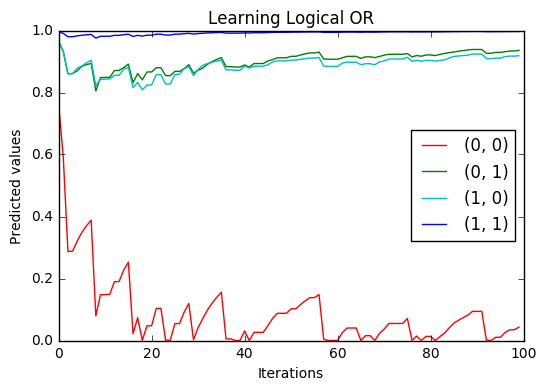

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

colors = {(0, 0): 'r',
          (0, 1): 'g',
          (1, 0): 'c',
          (1, 1): 'b'}
for a in (0, 1):
    for b in (0, 1):
        plt.plot([prob[(a, b)] for prob in probs],
                 color=colors[(a, b)],
                 label='(%d, %d)' % (a, b))
plt.title('Learning Logical OR')
plt.xlabel('Iterations')
plt.ylabel('Predicted values')
plt.legend(loc='center right')